# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [2]:
# import libraries here
import pandas as pd
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [3]:
# your answer here
employee = pd.read_csv('Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [4]:
# your answer here-1st way
df2 = employee.groupby('Department').agg({'Salary':'mean'})
df2

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [5]:
# your answer here-2nd way
df2 = employee.pivot_table(index=["Department"], values=["Salary"], aggfunc=np.mean)
df2

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [6]:
# your answer here

df2 = employee.pivot_table(index=["Department","Title"], values=["Salary"], aggfunc=np.mean)
df2

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [7]:
# your answer here
df2 = employee.pivot_table(index=["Years","Title"], values=["Salary"])
df2

Salary
Years Title            
1     analyst        35
2     analyst        30
      associate      55
3     associate      55
4     analyst        35
7     associate      60
8     VP             70

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [8]:
# your answer here
df2 = employee.groupby(['Title','Department']).agg({'Salary':'mean','Department':'count'})
df2

Salary  Department
Title     Department                    
VP        HR            70.0           1
          IT            70.0           1
analyst   HR            32.5           2
          IT            32.5           2
associate IT            60.0           1
          Sales         55.0           2

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [9]:
# your answer here

df2 = employee.pivot_table(index=["Department","Title"], values=["Salary"],aggfunc=[np.median,max,min,np.std])
df2

#para los puestos de VP tiene sentido que la desviacion estandar sea NaN, todos los valores se mantienen iguales, aunque no entiendo bien porque el de Sales associate da 0 en lugar de NaN, aunque 
#es realmente el mismo comportamiento que se tiene en VP.


median    max    min       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     35     30  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     35     30  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [10]:
# your answer here
df2.fillna(0)

median    max    min       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     35     30  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     35     30  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [11]:
# your answer here

#numero de empleados por cada departamento y cuanto dinero se gasta en salarios
df2 =employee.groupby('Department').agg({'Department':'count','Salary':'sum'})
df2.rename(columns={'Department':'Number of employees'},inplace=True)
df2

,Number of employees,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [12]:
# your answer here
df2 =employee.groupby(['Department','Title']).agg({'Years':'sum','Salary':'mean'})
df2

Years  Salary
Department Title                   
HR         VP             8    70.0
           analyst        6    32.5
IT         VP             8    70.0
           analyst        3    32.5
           associate      7    60.0
Sales      associate      5    55.0

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [13]:
# your answer here--Your custom function here
        

In [14]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [32]:
# your answer here

fitbit = pd.read_csv('Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [23]:
# your answer here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, Calorie burned to LengthOfRestInMinutes
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Calorie burned          13 non-null     float64
 1   Steps                   13 non-null     float64
 2   Distance                13 non-null     float64
 3   Floors                  13 non-null     float64
 4   Minutes Sedentary       13 non-null     float64
 5   Minutes Lightly Active  13 non-null     float64
 6   Minutes Fairly Active   13 non-null     float64
 7   Minutes Very Active     13 non-null     float64
 8   Activity Calories       13 non-null     float64
 9   MinutesOfSleep          13 non-null     float64
 10  MinutesOfBeingAwake     13 non-null     float64
 11  NumberOfAwakings        13 non-null     float64
 12  LengthOfRestInMinutes   13 non-null     float64
dtypes: float64(13)
memory usage: 2.0+ KB


,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
Calorie burned,1.000000,0.607185,0.715323,0.380319,-0.039045,0.427702,0.356068,0.528585,0.180673,0.070989,0.079114,0.064909,0.077182
Steps,0.607185,1.000000,0.829712,0.375515,-0.121997,0.403785,0.320967,0.632145,0.236142,0.093109,0.121792,0.105277,0.096470
Distance,0.715323,0.829712,1.000000,0.464446,-0.067611,0.423159,0.352863,0.768415,0.239736,0.091021,0.114752,0.081757,0.095184
Floors,0.380319,0.375515,0.464446,1.000000,0.096765,-0.084382,0.418540,0.562426,-0.039804,0.087230,0.107117,0.076728,0.098846
Minutes Sedentary,-0.039045,-0.121997,-0.067611,0.096765,1.000000,-0.129011,0.025671,0.013758,-0.099685,0.111631,0.132987,0.109951,0.111999


In [17]:
# your answer here
fitbit.describe().T

,count,mean,std,min,25%,50%,75%,max
Calorie burned,367.0,2741.501362,916.307036,179.000,2698.000,2974.00,3233.00,4351.00
Steps,367.0,10121.588556,5594.836225,0.000,6730.500,10413.00,13916.50,26444.00
Distance,367.0,8.549128,3.409881,0.000,6.155,8.29,10.56,20.45
Floors,367.0,11.724796,10.337370,0.000,5.000,11.00,16.00,101.00
Minutes Sedentary,367.0,563.934482,294.793145,1.002,520.000,663.00,756.50,998.00
Minutes Lightly Active,367.0,236.405995,86.531376,0.000,179.000,226.00,290.00,472.00
Minutes Fairly Active,367.0,26.163488,20.319456,0.000,8.000,24.00,41.50,101.00
Minutes Very Active,367.0,35.722071,31.006682,0.000,10.500,29.00,54.00,153.00
Activity Calories,367.0,2044.147139,2041.267168,0.000,1218.500,1553.00,1927.50,9830.00
MinutesOfSleep,367.0,290.479564,154.752328,0.000,224.000,337.00,400.50,553.00


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [27]:
# your answer here
fitbit =fitbit.corr(method='spearman')
fitbit[['Minutes Very Active','Steps']]

,Minutes Very Active,Steps
Calorie burned,0.528585,0.607185
Steps,0.632145,1.000000
Distance,0.768415,0.829712
Floors,0.562426,0.375515
Minutes Sedentary,0.013758,-0.121997
Minutes Lightly Active,-0.058315,0.403785
Minutes Fairly Active,0.451926,0.320967
Minutes Very Active,1.000000,0.632145
Activity Calories,0.124531,0.236142
MinutesOfSleep,0.062626,0.093109


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

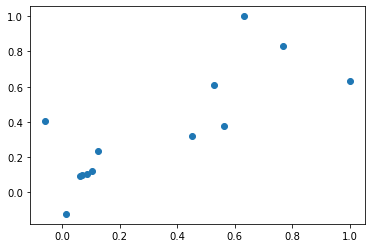

In [19]:
# your answer here
import matplotlib.pyplot as plt

plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])

#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
# your comment here
#Creo que en este caso hay una correlacion entre los steps y los minutos activos, tiene sentido que entre mayor numero de steps haya mas minutos de actividad, por lo tanto, diria que es una relacion mas lineal.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [28]:
# your answer here
fitbit[['Minutes Sedentary','Steps']]

,Minutes Sedentary,Steps
Calorie burned,-0.039045,0.607185
Steps,-0.121997,1.000000
Distance,-0.067611,0.829712
Floors,0.096765,0.375515
Minutes Sedentary,1.000000,-0.121997
Minutes Lightly Active,-0.129011,0.403785
Minutes Fairly Active,0.025671,0.320967
Minutes Very Active,0.013758,0.632145
Activity Calories,-0.099685,0.236142
MinutesOfSleep,0.111631,0.093109


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

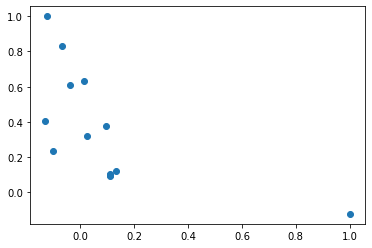

In [29]:
# your answer here
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])

In [22]:
# Your comment here
#igualmente es una relacion lineal pero con pendiente negativa, en este caso, entre mayor sean lo minutos sin moverse, menor seran los pasos generados.

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [30]:
# your answer here
fitbit[['MinutesOfSleep','Steps']]

,MinutesOfSleep,Steps
Calorie burned,0.070989,0.607185
Steps,0.093109,1.000000
Distance,0.091021,0.829712
Floors,0.087230,0.375515
Minutes Sedentary,0.111631,-0.121997
Minutes Lightly Active,0.079730,0.403785
Minutes Fairly Active,0.112396,0.320967
Minutes Very Active,0.062626,0.632145
Activity Calories,0.021926,0.236142
MinutesOfSleep,1.000000,0.093109


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

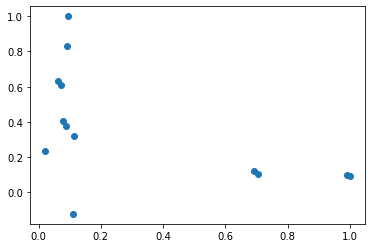

In [31]:
# your answer here
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])
#creo que es una situacion similar a la de minutos sin movimiento, dormir o reposar es equivalente a no moverse, entonces los pasos totales van a disminuir.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [37]:
# your answer here

column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']


cor_fit = fitbit[column]
cor_fit = cor_fit.corr()

In [38]:
#Print cor_fit
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [44]:
# your answer here
cor_fit.sort_values(by=['Steps'] ,axis=0,ascending=False)
#las mas correlacionadas son Calorie burned y Minutes Very Active

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [45]:
# your answer here

time_grades = pd.read_csv('Time_Grades.csv')

In [47]:
#Print time_grades
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

<AxesSubplot:ylabel='Frequency'>

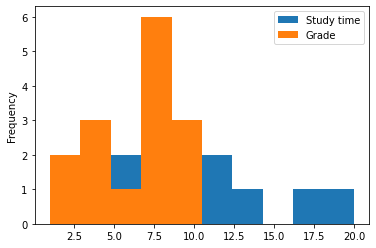

In [49]:
# your answer here
time_grades.plot.hist()

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [51]:
# your answer here-Pearson 
time_gradesP = time_grades.corr('pearson')
time_gradesP

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [54]:
## your answer here-Spearman
time_gradesS= time_grades.corr('spearman')
time_gradesP

#y si, hay una correlacion alta entre el tiempo de estudio y la calificacion que se obtiene, para los dos casos es similar.

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

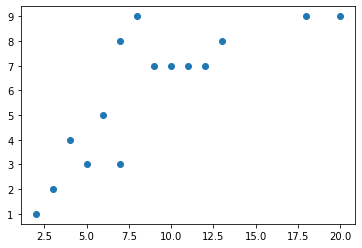

In [55]:
# your answer here
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])


In [34]:
#your comment here
#como nos dimos cuenta en la parte de correlacion, se puede observar en la grafica que entre mayor sea el tiempo de estudio, se espera que la calificacion obtenida sea mayor, es decir, se tiene una relacion lineal.

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [35]:
#your comment here
#La correlacion de Pearson y Spearman son similares con la excepcion de que Spearman puede considerar una relacion lineal, o bien, mientras una variable se incrementa la otra decrementa pero no al mismo 
#incremento que una relacion lineal.